In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


In [16]:
PlayerStats21 = "/Users/henry/Desktop/CS345/Final_Project/fantasy-football/training_set/2021/2021_player_stats.csv"
PlayerPoints21 = "/Users/henry/Desktop/CS345/Final_Project/fantasy-football/training_set/2021/2022_player_points.csv"
PlayerStats20 = "//Users/henry/Desktop/CS345/Final_Project/fantasy-football/training_set/2020/2020_player_stats.csv"
PlayerPoints20 = "/Users/henry/Desktop/CS345/Final_Project/fantasy-football/training_set/2020/2021_player_points.csv"
PlayerStats19 = "/Users/henry/Desktop/CS345/Final_Project/fantasy-football/training_set/2021/2021_player_stats.csv"
PlayerPoints19 = "/Users/henry/Desktop/CS345/Final_Project/fantasy-football/training_set/2019/2019_player_stats.csv"

stats21 = pd.read_csv(PlayerStats21)
points21 = pd.read_csv(PlayerPoints21)
stats20 = pd.read_csv(PlayerStats21)
points20 = pd.read_csv(PlayerPoints21)
stats19 = pd.read_csv(PlayerStats21)
points19 = pd.read_csv(PlayerPoints21)
combined_stats = pd.concat([stats21, stats20, stats19])
combined_points = pd.concat([points21, points20, points19])



In [14]:

numerical_features = [ 'G', 'GS', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', '2PM', '2PP']
scaler = MinMaxScaler()
combined_stats[numerical_features] = scaler.fit_transform(combined_stats[numerical_features])

merged_df = pd.merge(combined_stats, combined_points, on='PLAYER')
merged_df.dropna(inplace=True)
X = merged_df.drop(['PLAYER', 'PPG', 'Age'], axis=1)
y = merged_df['PPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:

from sklearn.model_selection import GridSearchCV
rf_regressor = RandomForestRegressor()
X_train, X_val , y_train, y_val = train_test_split(X_train, y_train, test_size=.3, random_state=42)

rf_param_grid = {
    "n_estimators" : [10,20,30],
    "max_features" : ["sqrt", "log2"],
    "min_samples_split" : [2,4,8],
    "bootstrap": [True, False]
    }

#gwiddy = GridSearchCV(rf_regressor,param_grid=rf_param_grid, cv = 5)

#gwiddy.fit(X_train, y_train)
#print(gwiddy.best_params_)



MAE: 0.053874429604074826, MSE: 0.16079335844358172, RMSE: 0.40099047176158903
Cross-validated RMSE: 0.5657628308630865


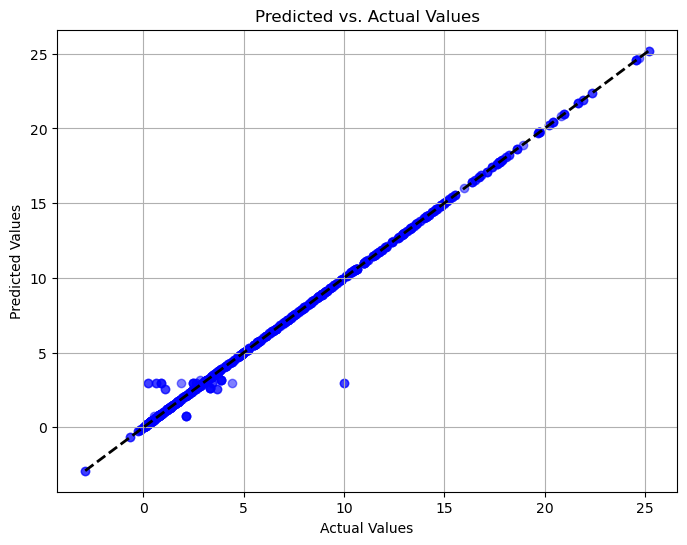

In [21]:
better_rf = RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=2, n_estimators=20)

better_rf.fit(X_train, y_train)
y_pred = better_rf.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

cv_scores = cross_val_score(better_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.grid(True)
plt.show()




MAE: 0.14149737035351617, MSE: 0.23695514403118195, RMSE: 0.4867803858324429
Cross-validated RMSE: 0.6789403157744689


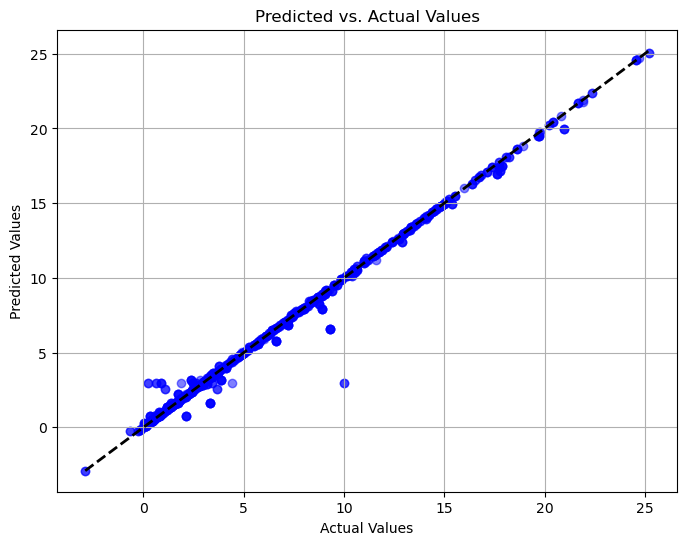

In [22]:

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.grid(True)
plt.show()





MAE: 0.08222809589403118, MSE: 0.12637944111938, RMSE: 0.3554988623320474
Cross-validated RMSE: 0.619776292663118


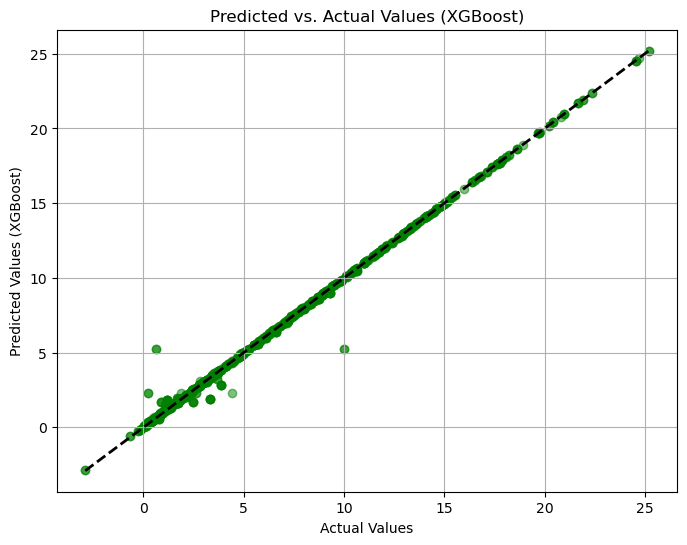

In [8]:

xgb_regressor = xgb.XGBRegressor()



xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred_xgb)
mse = mean_squared_error(y_val, y_pred_xgb)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

cv_scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_xgb, color='green', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (XGBoost)')
plt.title('Predicted vs. Actual Values (XGBoost)')
plt.grid(True)
plt.show()

In [9]:

xgb_param = xgb.XGBRegressor()

xgb_param_grid = {
    "nthread" : [4],
    "learning_rate" : [.03, .05,  .07],
    "max_depth" : [5,6,7],
    "min_samples_split" : [2,4,8],
    }

gwiddy = GridSearchCV(xgb_param,param_grid=xgb_param_grid, cv = 5)

gwiddy.fit(X_train, y_train)
print(gwiddy.best_params_)



[17:51:35] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_35t0jcmnzk/croot/xgboost-split_1712794695009/work/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[17:51:35] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_35t0jcmnzk/croot/xgboost-split_1712794695009/work/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[17:51:35] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_35t0jcmnzk/croot/xgboost-split_1712794695009/work/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[17:51:35] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_35t0jcmnzk/croot/xgboost-split_1712794695009/work/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[17:51:35] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_35t0jcmnzk/croot/xgboost-split_1712794695009/work/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[17:51:35] WARNING: /var/

MAE: 0.5284370524682392, MSE: 0.6190615530834871, RMSE: 0.7868046473448712
Cross-validated RMSE: 0.8705979896426337


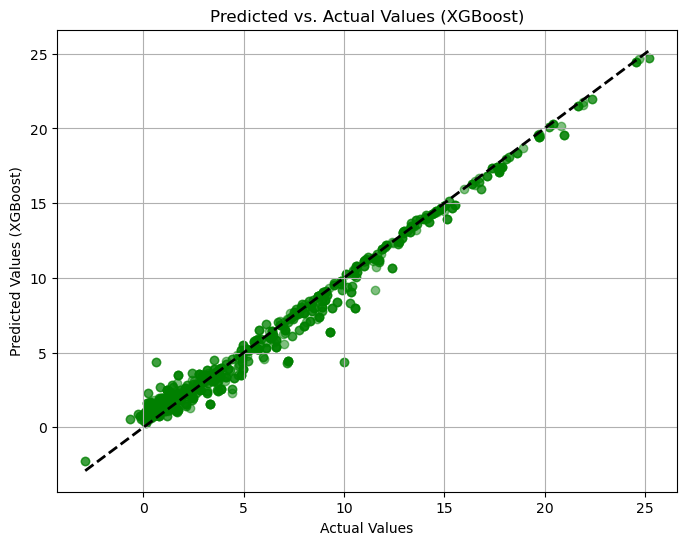

In [10]:



better_xgb = xgb.XGBRegressor(learning_rate=.07, max_depth = 7)

better_xgb.fit(X_train, y_train)
y_pred_xgb = better_xgb.predict(X_val)
mae = mean_absolute_error(y_val, y_pred_xgb)
mse = mean_squared_error(y_val, y_pred_xgb)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

cv_scores = cross_val_score(better_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_xgb, color='green', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (XGBoost)')
plt.title('Predicted vs. Actual Values (XGBoost)')
plt.grid(True)
plt.show()

MAE: 2.457412451158374, MSE: 10.52655227555127, RMSE: 3.2444648673627627


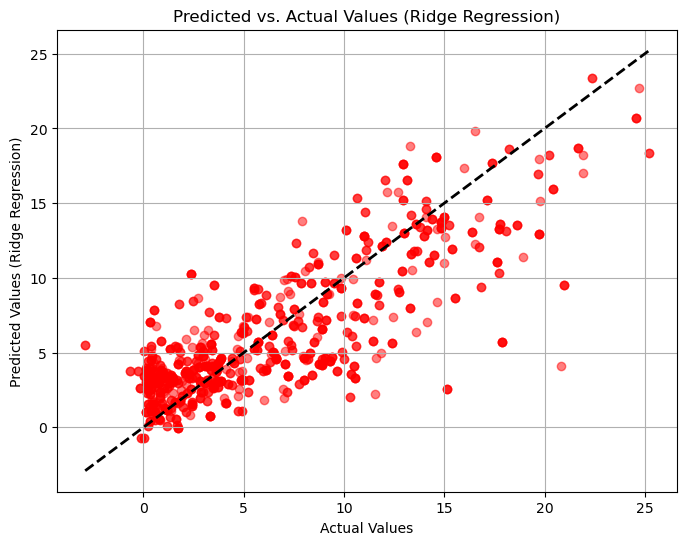

In [11]:
from sklearn.linear_model import Ridge

# Model training
ridge_regressor = Ridge()  
ridge_regressor.fit(X_train, y_train)

# Model evaluation
y_pred_ridge = ridge_regressor.predict(X_val)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
mae = mean_absolute_error(y_val, y_pred_ridge)
mse = mean_squared_error(y_val, y_pred_ridge)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')
# Plotting predicted vs. actual values for Ridge regression
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_ridge, color='red', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Ridge Regression)')
plt.title('Predicted vs. Actual Values (Ridge Regression)')
plt.grid(True)
plt.show()



In [24]:
test_players_stats = "/Users/henry/Desktop/CS345/Final_Project/fantasy-football/test_set/2022_player_stats.csv"
test_players_labels = "/Users/henry/Desktop/CS345/Final_Project/fantasy-football/test_set/2023_player_points.csv"
stats22 = pd.read_csv(test_players_stats)
points22 = pd.read_csv(test_players_labels)
player_name = 'Josh Allen'
stat_column = 'PPG'




stat_value = points22.loc[points22['Player'] == player_name, stat_column].values[0]
pookiePoints = points22[points22['Player'] == 'Josh Allen']
pookiePoints = pookiePoints.drop(["Player"], axis=1)
Pookie= stats22[stats22['PLAYER'] == 'Josh Allen']
Pookie = Pookie.drop(["PLAYER", 'Age'], axis=1)
y_pred = rf_regressor.predict(Pookie)
print("Josh Allen")
print(f"prediction: {y_pred} ")
print(f"Actual: {stat_value}")


Josh Allen
prediction: [21.8296698] 
Actual: 23.094117647058823
